In [369]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [370]:
data=pd.read_csv('BTC-USD.csv',parse_dates=["Date"],sep=',')

#convert dates from string to datetime objects
data["Date"]=pd.to_datetime(data["Date"])

#keep only the date part of datetime object
data["Date"]=data["Date"].dt.date

#drop the nan values
data.isna().sum()
data.dropna(axis=0,how='any',inplace=True)
data.isna().sum()


#change volume to integer
#data["Volume"]=data["Volume"].astype('int64')



Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [371]:
data["Pct_Change"]=data["Close"].pct_change().fillna(0)
data["Up-Down"]=(data["Pct_Change"]>0).astype(int)

In [372]:
#drop the dates where change is 0
id_to_drop=data.loc[data["Pct_Change"]==0].index

logreg_data=data.drop(id_to_drop,axis=0,inplace=False)

logreg_data

,Date,Open,High,Low,Close,Adj Close,Volume,Pct_Change,Up-Down
1,2016-12-14,780.005005,782.033997,776.838989,781.481018,781.481018,7.597900e+07,0.001185,1
2,2016-12-15,780.070007,781.434998,777.802002,778.088013,778.088013,8.158010e+07,-0.004342,0
3,2016-12-16,778.963013,785.031982,778.963013,784.906982,784.906982,8.360820e+07,0.008764,1
4,2016-12-17,785.166016,792.508972,784.864014,790.828979,790.828979,7.898980e+07,0.007545,1
5,2016-12-18,791.007996,794.737000,788.026001,790.530029,790.530029,6.052440e+07,-0.000378,0
...,...,...,...,...,...,...,...,...,...
1822,2021-09-12,50450.082030,50797.164060,47358.351560,47672.121090,47672.121090,2.960358e+10,-0.056087,0
1823,2021-10-12,47642.144530,50015.253910,47023.699220,47243.304690,47243.304690,3.096601e+10,-0.008995,0
1824,2021-11-12,47264.632810,49458.210940,46942.347660,49362.507810,49362.507810,2.577587e+10,0.044857,1
1825,2021-12-12,49354.855470,50724.867190,48725.851560,50098.335940,50098.335940,2.193922e+10,0.014907,1


In [373]:
logreg_data['Time_dummy']=np.arange(len(logreg_data.index))
logreg_data['Time_dummy']=logreg_data['Time_dummy'].astype('float64')

In [374]:
from sklearn.model_selection import train_test_split
x=logreg_data[["Open","Time_dummy"]]
y=logreg_data["Up-Down"]
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=9878)


In [375]:
prepro=preprocessing.MinMaxScaler()
data_float=logreg_data.loc[:, logreg_data.dtypes=='float64']
data_scaled=pd.DataFrame(prepro.fit_transform(data_float), index=data_float.index,columns=data_float.columns)
data_scaled["Pct_Change"]=logreg_data['Pct_Change']
data_scaled["Date"]=logreg_data["Date"]
data_scaled=data_scaled[['Date','Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume','Pct_Change',
       'Time_dummy']]
data_scaled["Up-Down"]=logreg_data["Up-Down"]
data_scaled

,Date,Open,High,Low,Close,Adj Close,Volume,Pct_Change,Time_dummy,Up-Down
1,2016-12-14,0.000072,0.000009,0.000321,0.000056,0.000056,0.000044,0.001185,0.000000,1
2,2016-12-15,0.000073,0.000000,0.000336,0.000005,0.000005,0.000060,-0.004342,0.000549,0
3,2016-12-16,0.000057,0.000053,0.000354,0.000107,0.000107,0.000066,0.008764,0.001099,1
4,2016-12-17,0.000150,0.000163,0.000444,0.000196,0.000196,0.000053,0.007545,0.001648,1
5,2016-12-18,0.000237,0.000196,0.000492,0.000191,0.000191,0.000000,-0.000378,0.002198,0
...,...,...,...,...,...,...,...,...,...,...
1822,2021-09-12,0.743920,0.735437,0.710121,0.702126,0.702126,0.084183,-0.056087,0.997802,0
1823,2021-10-12,0.701869,0.723940,0.705021,0.695706,0.695706,0.088065,-0.008995,0.998352,0
1824,2021-11-12,0.696215,0.715749,0.703782,0.727436,0.727436,0.073276,0.044857,0.998901,1
1825,2021-12-12,0.727518,0.734374,0.730958,0.738453,0.738453,0.062343,0.014907,0.999451,1


In [376]:
x=data_scaled[["Open","Time_dummy"]]
y=data_scaled["Up-Down"]
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=9878)
logreg_model=LogisticRegression()
logreg_model_fitted=logreg_model.fit(x_train,y_train)

In [377]:
predictions=logreg_model_fitted.predict(x_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.48      0.17      0.25       200
           1       0.57      0.86      0.68       256

    accuracy                           0.55       456
   macro avg       0.52      0.51      0.47       456
weighted avg       0.53      0.55      0.49       456



In [389]:
x=data_scaled[["Open","Time_dummy","Volume"]]
y=data_scaled["Up-Down"]
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=9878)
logreg_model=LogisticRegression()
logreg_model_fitted=logreg_model.fit(x_train,y_train)
predictions=logreg_model_fitted.predict(x_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.45      0.15      0.23       200
           1       0.56      0.85      0.68       256

    accuracy                           0.55       456
   macro avg       0.51      0.50      0.45       456
weighted avg       0.51      0.55      0.48       456



In [390]:
x=data_scaled[["Time_dummy","Volume"]]
y=data_scaled["Up-Down"]
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=9878)
logreg_model=LogisticRegression()
logreg_model_fitted=logreg_model.fit(x_train,y_train)
predictions=logreg_model_fitted.predict(x_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       200
           1       0.56      1.00      0.72       256

    accuracy                           0.56       456
   macro avg       0.28      0.50      0.36       456
weighted avg       0.32      0.56      0.40       456



c:\Users\pchrk\OneDrive\Desktop\cs\3rd\ml\ml-env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pchrk\OneDrive\Desktop\cs\3rd\ml\ml-env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pchrk\OneDrive\Desktop\cs\3rd\ml\ml-env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

In [378]:


# pred_df=pd.DataFrame(predictions,index=x_test.index,columns=["Up-Down Prediction"])
# compare_df=pd.concat([pred_df,y_test],axis=1)
# compare_df.sort_index(inplace=True)

In [380]:
# #for logistic regression we compute accuracy not r2 or mse
# #acc=logreg_model_fitted.score(compare_df["Up-Down Prediction"],y_test)
# # compare_df.iloc(compare_df["Up-Down Prediction"]==compare_df["Up-Down"])
# compare_df["True_pred"]=np.where(compare_df["Up-Down Prediction"]==compare_df["Up-Down"],1,0)
# compare_df

## Implementing logistic regreesion in 3 different time periods

In [381]:
d_750=data_scaled.iloc[0:750]
x=d_750[["Open","Volume","Time_dummy"]]
y=d_750["Up-Down"]
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=9878)
x_test

,Open,Volume,Time_dummy
326,0.095685,0.006905,0.178022
452,0.128423,0.015176,0.247253
410,0.155744,0.021436,0.224176
478,0.090955,0.015897,0.261538
732,0.036972,0.009948,0.401099
...,...,...,...
555,0.089928,0.009884,0.303846
718,0.048661,0.015144,0.393407
419,0.112249,0.026286,0.229121
474,0.093267,0.012742,0.259341


In [382]:
logreg_model=LogisticRegression()
logreg_model_fitted=logreg_model.fit(x_train,y_train)
predictions=logreg_model_fitted.predict(x_test)
pred_df=pd.DataFrame(predictions,index=x_test.index,columns=["Up-Down Prediction"])
compare_df=pd.concat([pred_df,y_test],axis=1)
# number_of_true_predictions=(compare_df["True_pred"]==1).sum()
# number_of_total_predictions=compare_df.shape[0]
# number_of_false_predictions=number_of_total_predictions-number_of_true_predictions

# lr_accuracy=number_of_true_predictions/number_of_total_predictions
# lr_accuracy
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.62      0.06      0.11        81
           1       0.58      0.97      0.72       107

    accuracy                           0.58       188
   macro avg       0.60      0.52      0.42       188
weighted avg       0.60      0.58      0.46       188



In [384]:
d_1500=data_scaled.iloc[751:1500]
x=d_1500[["Open","Volume","Time_dummy"]]
y=d_1500["Up-Down"]
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=9878)

logreg_model=LogisticRegression()
logreg_model_fitted=logreg_model.fit(x_train,y_train)
predictions=logreg_model_fitted.predict(x_test)
pred_df=pd.DataFrame(predictions,index=x_test.index,columns=["Up-Down Prediction"])
compare_df=pd.concat([pred_df,y_test],axis=1)
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        91
           1       0.52      1.00      0.68        97

    accuracy                           0.52       188
   macro avg       0.26      0.50      0.34       188
weighted avg       0.27      0.52      0.35       188



c:\Users\pchrk\OneDrive\Desktop\cs\3rd\ml\ml-env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pchrk\OneDrive\Desktop\cs\3rd\ml\ml-env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pchrk\OneDrive\Desktop\cs\3rd\ml\ml-env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

In [385]:
d_end=data_scaled.iloc[1501:1821]
x=d_end[["Open","Volume","Time_dummy"]]
y=d_end["Up-Down"]
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=9878)

logreg_model=LogisticRegression()
logreg_model_fitted=logreg_model.fit(x_train,y_train)
predictions=logreg_model_fitted.predict(x_test)
pred_df=pd.DataFrame(predictions,index=x_test.index,columns=["Up-Down Prediction"])
compare_df=pd.concat([pred_df,y_test],axis=1)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.45      0.78      0.57        32
           1       0.71      0.35      0.47        48

    accuracy                           0.53        80
   macro avg       0.58      0.57      0.52        80
weighted avg       0.60      0.53      0.51        80



Logistic Regression on lagged data

In [386]:
data_scaled["Close-lag1"]=data_scaled["Close"].shift(periods=1)
data_scaled

,Date,Open,High,Low,Close,Adj Close,Volume,Pct_Change,Time_dummy,Up-Down,Close-lag1
1,2016-12-14,0.000072,0.000009,0.000321,0.000056,0.000056,0.000044,0.001185,0.000000,1,NaN
2,2016-12-15,0.000073,0.000000,0.000336,0.000005,0.000005,0.000060,-0.004342,0.000549,0,0.000056
3,2016-12-16,0.000057,0.000053,0.000354,0.000107,0.000107,0.000066,0.008764,0.001099,1,0.000005
4,2016-12-17,0.000150,0.000163,0.000444,0.000196,0.000196,0.000053,0.007545,0.001648,1,0.000107
5,2016-12-18,0.000237,0.000196,0.000492,0.000191,0.000191,0.000000,-0.000378,0.002198,0,0.000196
...,...,...,...,...,...,...,...,...,...,...,...
1822,2021-09-12,0.743920,0.735437,0.710121,0.702126,0.702126,0.084183,-0.056087,0.997802,0,0.744539
1823,2021-10-12,0.701869,0.723940,0.705021,0.695706,0.695706,0.088065,-0.008995,0.998352,0,0.702126
1824,2021-11-12,0.696215,0.715749,0.703782,0.727436,0.727436,0.073276,0.044857,0.998901,1,0.695706
1825,2021-12-12,0.727518,0.734374,0.730958,0.738453,0.738453,0.062343,0.014907,0.999451,1,0.727436


In [387]:
d=data_scaled.iloc[1:]
x=d[["Close-lag1"]]
y=d["Up-Down"]
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=9878)
print(type(x_test))
logreg_model=LogisticRegression()
logreg_model_fitted=logreg_model.fit(x_train,y_train)
# predictions=logreg_model_fitted.predict(x_test)
# pred_df=pd.DataFrame(predictions,index=x_test.index,columns=["Up-Down Prediction"])
# compare_df=pd.concat([pred_df,y_test],axis=1)
# print(classification_report(y_test,predictions))


<class 'pandas.core.frame.DataFrame'>


In [388]:
compare_df.sort_index(inplace=True)
from sklearn.metrics import confusion_matrix


## Logistic regression prediction with rolling window of 30 prices as sample and 1 prediction

c:\Users\pchrk\OneDrive\Desktop\cs\3rd\ml\ml-env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pchrk\OneDrive\Desktop\cs\3rd\ml\ml-env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pchrk\OneDrive\Desktop\cs\3rd\ml\ml-env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

[0.6866666666666666, 0.6466666666666666, 0.6933333333333334, 0.6266666666666667, 0.6866666666666666, 0.6333333333333333, 0.6866666666666666, 0.6666666666666666, 0.6866666666666666, 0.6533333333333333, 0.68, 0.6533333333333333, 0.68, 0.6733333333333333, 0.6933333333333334, 0.6666666666666666, 0.6666666666666666, 0.6466666666666666, 0.66, 0.6466666666666666, 0.68, 0.68, 0.68, 0.6733333333333333, 0.68, 0.66, 0.6666666666666666, 0.66, 0.66, 0.66, 0.66, 0.6533333333333333, 0.6466666666666666, 0.6466666666666666, 0.6466666666666666, 0.6466666666666666, 0.6466666666666666, 0.6533333333333333, 0.6466666666666666, 0.6466666666666666, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.6333333333333333] [0.6866666666666666, 0.6466666666666666, 0.6933333333333334, 0.6266666666666667, 0.6866666666666666, 0.6333333333333333, 0.6866666666666666, 0.6666666666666666, 0.6866666666666666, 0.6533333333333333, 0.68, 0.6533333333333333, 0.68, 0.6733333333333333, 0.6933333333333334, 0.6666666666666666, 0.6666666666666666

c:\Users\pchrk\OneDrive\Desktop\cs\3rd\ml\ml-env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pchrk\OneDrive\Desktop\cs\3rd\ml\ml-env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pchrk\OneDrive\Desktop\cs\3rd\ml\ml-env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Text(0.5, 1.0, 'accuracy and window size')

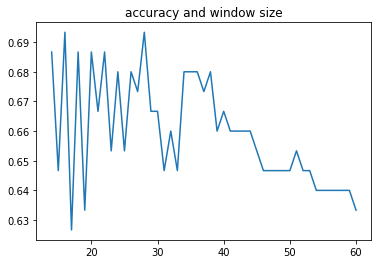

In [368]:
d=data_scaled.iloc[1:]
x=d[["Close-lag1","Pct_Change"]]
y=d["Up-Down"]
#x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=9878)

#window size is the index
accuracy_list=[]
weighted_recall=[]
weighted_precision=[]
weighted_f1=[]

windows=[i for i in range(14,61)]
for window in windows:
    predictions=[]
    real=[]
    start=1
    while (start<=150):
        x_train=x.iloc[start:start+window]
        y_train=y.iloc[start:start+window]
        x_test=x.iloc[[start+window+1]]
        y_test=y.iloc[start+window+1]
        real.append(y_test)
        logreg_model=LogisticRegression()
        logreg_model_fitted=logreg_model.fit(x_train,y_train)
        prediction=logreg_model_fitted.predict(x_test)
        predictions.append(prediction[0])
        # print(start, " ", "regressors are: ", logreg_model_fitted.coef_)
        # print(start," ","prediction is: ", prediction , "real value is : ", y_test)
        
        # pred_df=pd.DataFrame(predictions,index=x_test.index,columns=["Up-Down Prediction"])
        # compare_df=pd.concat([pred_df,y_test],axis=1)
        start=start+1
    # print(real,predictions)
    accuracy_list.append(classification_report(real,predictions, output_dict=True).get('accuracy'))
    weighted_precision.append(classification_report(real,predictions, output_dict=True).get('weighted avg').get('precision'))
    weighted_recall.append(classification_report(real,predictions, output_dict=True).get('weighted avg').get('recall'))
    weighted_f1.append(classification_report(real,predictions, output_dict=True).get('weighted avg').get('f1-score'))

print(accuracy_list
,weighted_recall
,weighted_precision
,weighted_f1)

plt.plot(windows,accuracy_list)
plt.title('accuracy and window size')


# pred_df=pd.DataFrame(predictions,index=x_test.index,columns=["Up-Down Prediction"])
# compare_df=pd.concat([pred_df,y_test],axis=1)
# print(classification_report(y_test,predictions))